In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'galaxy distance versus red shift ')

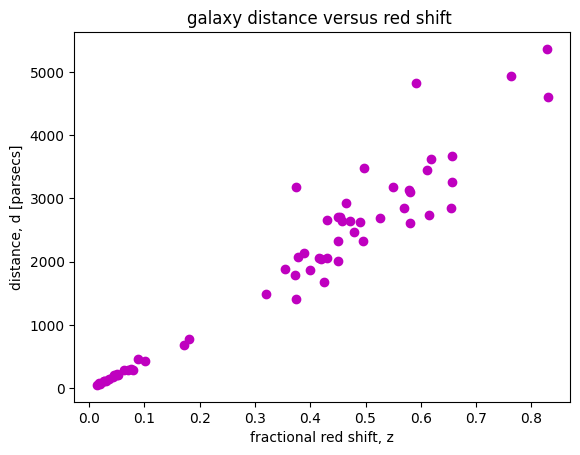

In [ ]:
hubbledata = np.loadtxt("/content/drive/MyDrive/Courses/phy508/hubble-low-z.txt")
hubbledata = np.loadtxt("/content/drive/MyDrive/Courses/phy508/hubble.txt")
x = hubbledata[:,0]
y = hubbledata[:,1]
N = x.size

plt.plot( x, y, 'mo')
plt.xlabel("fractional red shift, z")
plt.ylabel("distance, d [parsecs]")
plt.title('galaxy distance versus red shift ')

In [ ]:
Npars = 2
ipar = np.arange(0, Npars)
X = np.column_stack( (np.ones(N), x))  # define matrix M
#X = np.column_stack( (np.ones(N), x, x**2))  # define matrix M

XT = X.transpose()                    # calc transpose MT
XTY = np.dot(XT,y)                    # 2-element vector involving y_i's
XTX = np.dot( XT, X)                  # 2x2 matrix involving x_i's
IXTX = np.linalg.inv(XTX)             # 2x2 matrix involving x_i's

pars = np.dot(IXTX,XTY)               # 2-element vector of parameters, m,c

yf =  np.dot(X,pars)
residuals = yf-y
chisq = np.sum(residuals**2)
var = chisq / (N-2)

covs = IXTX*var

for ip in range(0,Npars):
     print("par ", ip," slope = ",pars[ip]," +/- ",np.sqrt(covs[ip,ip]))

HoINV = pars[1]*3.26e6 # conversion factor 3.26 lyr / c
print("Hubble time = ", HoINV*1e-9," billion years")


par  0  slope =  -128.9300592460675  +/-  94.05146078889815
par  1  slope =  5757.255303529274  +/-  217.80005915132475
Hubble time =  18.768652289505432  billion years


Text(0.5, 1.0, 'fit residuals')

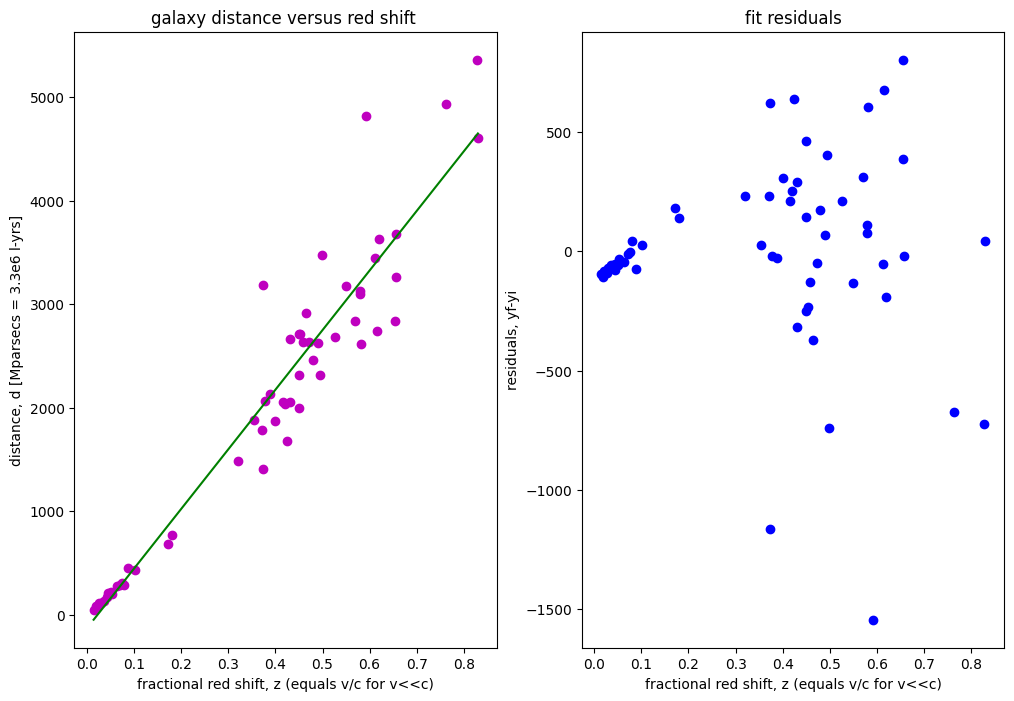

In [ ]:

fig, axes = plt.subplots(1,2, figsize=(12, 8))

axes[0].plot(x,y,'mo')
axes[0].plot(x,yf,"g-")
axes[0].set_xlabel("fractional red shift, z (equals v/c for v<<c)" )
axes[0].set_ylabel("distance, d [Mparsecs = 3.3e6 l-yrs]")
axes[0].set_title('galaxy distance versus red shift ')

axes[1].plot(x,residuals,"bo")
axes[1].set_xlabel("fractional red shift, z (equals v/c for v<<c)" )
axes[1].set_ylabel("residuals, yf-yi")
axes[1].set_title('fit residuals')



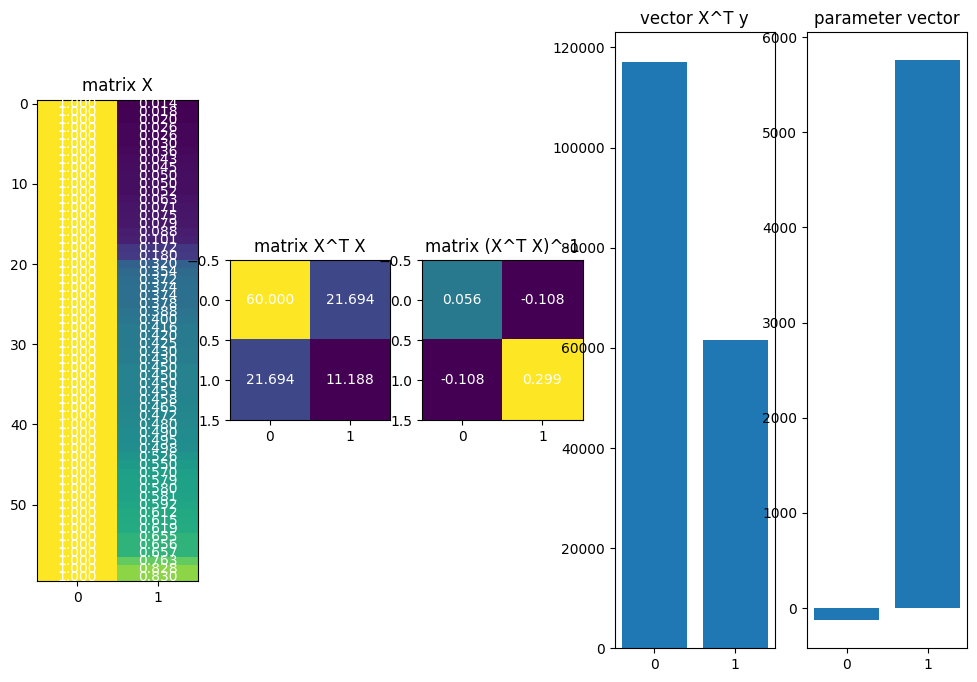

In [ ]:
def add_vals(data, ax):
   for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            ax.text(j, i, f'{data[i, j]:.3f}', ha='center', va='center', color='white')

fig, axes = plt.subplots(1,5, figsize=(12, 8))

axes[0].imshow(X, cmap='viridis', interpolation='none', aspect=0.1)
add_vals(X, axes[0])
axes[0].set_title('matrix X')

axes[1].imshow(XTX, cmap='viridis', interpolation='none', aspect=1.)
add_vals(XTX, axes[1])
axes[1].set_title('matrix X^T X')

axes[2].imshow(IXTX, cmap='viridis', interpolation='none', aspect=1.)
add_vals(IXTX, axes[2])
axes[2].set_title('matrix (X^T X)^-1')

axes[3].bar(ipar,XTY)
axes[3].set_title('vector X^T y')

axes[4].bar(ipar,pars)
axes[4].set_title('parameter vector')

plt.show()